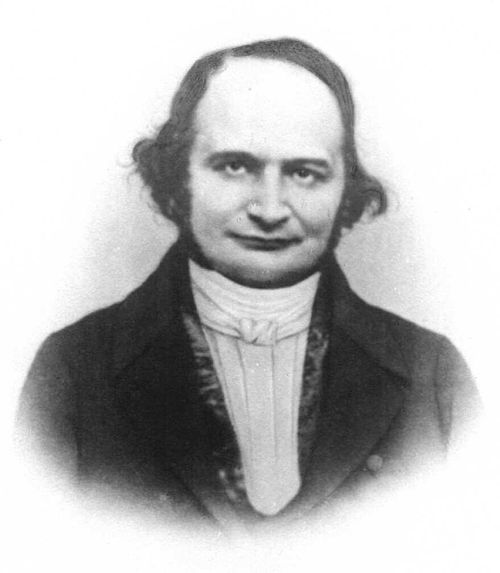
# Carl Gustav Jacob Jacobi

# The Jacobian — A Complete Conceptual, Geometric, and Statistical View

---

## 1. What the Jacobian Matrix Is (Core Definition)

Let

$$
f : \mathbb{R}^n \rightarrow \mathbb{R}^m,
\qquad
f(x) = (f_1(x), \ldots, f_m(x)).
$$

The Jacobian matrix of $f$ at point $x$ is

$$
J_f(x)
=
\begin{bmatrix}
\frac{\partial f_1}{\partial x_1} & \cdots & \frac{\partial f_1}{\partial x_n} \\
\vdots & \ddots & \vdots \\
\frac{\partial f_m}{\partial x_1} & \cdots & \frac{\partial f_m}{\partial x_n}
\end{bmatrix}.
$$

### Fundamental Meaning

The Jacobian matrix is the **best linear approximation** of a nonlinear transformation near a point.

Formally,

$$
f(x + \Delta x)
\approx
f(x) + J_f(x)\,\Delta x.
$$

---

## 2. Geometric Interpretation

The Jacobian matrix maps **infinitesimal vectors**.

It transforms **tangent spaces**.

It encodes **local stretching, rotation, and shearing** of space.

---

## 3. Jacobian Determinant (Special but Critical)

When

$$
n = m,
$$

the Jacobian matrix is square, and we define the Jacobian determinant:

$$
\det\big(J_f(x)\big).
$$

### Meaning of the Jacobian Determinant

The Jacobian determinant is the **local volume scaling factor** of the transformation.

If

$$
y = f(x),
$$

then infinitesimal volumes transform as

$$
dV_y = \left| \det J_f(x) \right| \, dV_x.
$$

### Orientation

Positive determinant implies orientation is preserved.

Negative determinant implies orientation is flipped.

Zero determinant implies dimensional collapse and non-invertibility.

---

## 4. Change of Variables (Why Jacobians Exist)

### Multivariate Integration

For a change of variables $y = f(x)$,

$$
\int_{f(A)} g(y)\,dy
=
\int_A g(f(x)) \, \left| \det J_f(x) \right| \, dx.
$$

Without the Jacobian determinant, integration under coordinate transformation is incorrect.

---

## 5. Probabilistic Interpretation

If

$$
x \sim p_X(x),
\qquad
y = f(x),
$$

then the transformed density satisfies

$$
p_Y(y)
=
p_X(x)\,
\left| \det J_f(x) \right|^{-1}.
$$

This is the **change-of-variables formula for probability densities**.

### Consequences

Enables exact likelihood computation.

Forms the mathematical foundation of normalizing flows.

---

## 6. Jacobian in Optimization and Learning

### Gradient Backpropagation

The Jacobian implements the multivariate chain rule:

$$
\frac{\partial L}{\partial x}
=
\frac{\partial L}{\partial y}
\cdot
\frac{\partial y}{\partial x}.
$$

### Stability

Large Jacobian norms lead to exploding gradients.

Small Jacobian norms lead to vanishing gradients.

---

## 7. Strengths of Jacobians

| Strength | Explanation |
|--------|-------------|
| Exact local linearization | Precise first-order behavior |
| Coordinate-free meaning | Independent of parameterization |
| Universal applicability | Geometry, probability, physics, machine learning |
| Enables invertibility analysis | $\det J \neq 0$ |
| Enables exact density modeling | Change-of-variables |

---

## 8. Weaknesses and Limitations

| Limitation | Explanation |
|-----------|------------|
| Local only | No global guarantees |
| Computationally expensive | Determinant costs $O(n^3)$ |
| Sensitive to noise | Derivatives amplify noise |
| Fails at singularities | Determinant equals zero |
| Hard in high dimensions | Memory and computation explode |

---

## 9. Applications Across Fields

### Mathematics

Multivariable integration.

Differential geometry.

Manifold theory.

### Physics

Coordinate transformations.

Continuum mechanics.

General relativity (metrics and Jacobians).

### Statistics

Density transformations.

Likelihood computation.

Reparameterization techniques.

### Machine Learning

Normalizing flows.

Implicit generative models.

Backpropagation.

Sensitivity analysis.

Stability analysis of deep networks.

---

## 10. Jacobian vs Related Concepts (Critical Comparison)

### 10.1 Jacobian Matrix vs Gradient

| Aspect | Gradient | Jacobian |
|------|----------|----------|
| Function type | Scalar $\rightarrow$ vector | Vector $\rightarrow$ vector |
| Shape | $n \times 1$ | $m \times n$ |
| Information | Direction of steepest ascent | Full local linear map |
| Jacobian contains gradient | — | Yes (special case) |

---

### 10.2 Jacobian vs Hessian

| Aspect | Jacobian | Hessian |
|------|----------|---------|
| Order | First-order | Second-order |
| Captures | Local linear behavior | Curvature |
| Shape | Matrix | Matrix / tensor |
| Use | Change of variables | Newton methods |

---

### 10.3 Jacobian Determinant vs Volume Form

| Aspect | Jacobian Determinant | Volume Form |
|------|----------------------|-------------|
| Depends on coordinates | Yes | No |
| Measures | Local volume scaling | Intrinsic volume |
| Used in | Calculus | Geometry |

---

### 10.4 Jacobian vs Divergence

| Aspect | Jacobian | Divergence |
|------|----------|------------|
| Output | Matrix | Scalar |
| Measures | Full deformation | Net expansion |
| Relation | Trace of Jacobian | $\nabla \cdot f$ |

---

### 10.5 Jacobian vs Lie Derivative

| Aspect | Jacobian | Lie Derivative |
|------|----------|----------------|
| Scope | Local linear map | Flow-based change |
| Static vs dynamic | Static | Dynamic |
| Used in | Calculus | Geometry and physics |

---

## 11. Jacobian in Modern Generative Models (Key Insight)

### Flow-Based Models

For invertible transformations,

$$
\log p(x)
=
\log p(z)
+
\log \left| \det J_f(x) \right|.
$$

### Design Constraints

The Jacobian must be invertible.

The determinant must be computationally tractable.

This single requirement shapes architectures such as:

NICE.

RealNVP.

Glow.

Continuous Normalizing Flows (using the trace of the Jacobian).

---

## 12. One-Line Mental Models

Jacobian matrix is a local linear lens.

Jacobian determinant is a local volume ruler.

Zero determinant implies dimensional collapse.

Large determinant implies expansion.

Negative determinant implies orientation flip.

---

## Final Synthesis

The Jacobian is the bridge between geometry, probability, and learning.

It explains how space bends, how densities move, and how gradients flow.


In [1]:
# ============================================================
# Jacobian Matrix & Jacobian Determinant Lab (End-to-End)
# FashionMNIST + Spatial Warp + detJ Regularization + Visuals
# ============================================================

import os, math, random, time
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# ---------------------------
# 0) Repro + Device
# ---------------------------
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

Device: cuda


In [2]:
# ---------------------------
# 1) Data (FashionMNIST)
# ---------------------------
# NOTE: Requires torchvision in your environment.
from torchvision import datasets, transforms

BATCH_SIZE = 128
tfm = transforms.Compose([transforms.ToTensor()])
train_ds = datasets.FashionMNIST(root="data", train=True, download=True, transform=tfm)
test_ds  = datasets.FashionMNIST(root="data", train=False, download=True, transform=tfm)
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, pin_memory=True)
test_loader  = DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

FASHION_LABELS = [
    "T-shirt/top","Trouser","Pullover","Dress","Coat",
    "Sandal","Shirt","Sneaker","Bag","Ankle boot"
]

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.2MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 190kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.52MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 18.4MB/s]


In [3]:
# ---------------------------
# 2) Core Math: grid, warp, Jacobian, detJ
# ---------------------------
def make_base_grid(B, H, W, device, dtype):
    """
    Normalized grid in [-1,1] for grid_sample.
    Returns: [B,H,W,2] where last dim = (x, y).
    """
    ys = torch.linspace(-1.0, 1.0, H, device=device, dtype=dtype)
    xs = torch.linspace(-1.0, 1.0, W, device=device, dtype=dtype)
    gy, gx = torch.meshgrid(ys, xs, indexing="ij")
    grid = torch.stack([gx, gy], dim=-1)          # [H,W,2]
    return grid.unsqueeze(0).repeat(B, 1, 1, 1)   # [B,H,W,2]

def warp_image(x, disp):
    """
    x:    [B,C,H,W]
    disp: [B,2,H,W] in normalized coords (dx,dy)
    """
    B,C,H,W = x.shape
    base = make_base_grid(B, H, W, x.device, x.dtype)          # [B,H,W,2]
    grid = base + disp.permute(0,2,3,1)                        # [B,H,W,2]
    xw = F.grid_sample(x, grid, mode="bilinear",
                       padding_mode="zeros", align_corners=True)
    return xw, grid

def finite_diff_jacobian(grid):
    """
    grid: [B,H,W,2] giving y(x) in normalized coords: y1=x', y2=y'
    Returns:
      J:    [B,H,W,2,2] where J[...,0,0]=dy1/dx, J[...,0,1]=dy1/dy, ...
      detJ: [B,H,W]
    """
    B,H,W,_ = grid.shape
    y1 = grid[...,0]  # x'
    y2 = grid[...,1]  # y'

    def ddx(t):
        t_pad = F.pad(t.unsqueeze(1), (1,1,0,0), mode="replicate").squeeze(1)
        return (t_pad[:,:,2:] - t_pad[:,:,:-2]) / 2.0

    def ddy(t):
        t_pad = F.pad(t.unsqueeze(1), (0,0,1,1), mode="replicate").squeeze(1)
        return (t_pad[:,2:,:] - t_pad[:,:-2,:]) / 2.0

    dy1_dx = ddx(y1)
    dy1_dy = ddy(y1)
    dy2_dx = ddx(y2)
    dy2_dy = ddy(y2)

    J = torch.zeros((B,H,W,2,2), device=grid.device, dtype=grid.dtype)
    J[...,0,0] = dy1_dx
    J[...,0,1] = dy1_dy
    J[...,1,0] = dy2_dx
    J[...,1,1] = dy2_dy

    detJ = J[...,0,0]*J[...,1,1] - J[...,0,1]*J[...,1,0]
    return J, detJ

def smoothness_loss(disp):
    """
    TV-like penalty on displacement field.
    disp: [B,2,H,W]
    """
    dx = disp[:,:,:,1:] - disp[:,:,:,:-1]
    dy = disp[:,:,1:,:] - disp[:,:,:-1,:]
    return dx.abs().mean() + dy.abs().mean()

def detJ_regularizers(detJ, lambda_fold=5.0, lambda_area=0.1):
    """
    fold: penalize detJ <= 0 (local non-invertibility)
    area: keep detJ near 1 (avoid heavy expansion/shrinkage)
    """
    fold = torch.relu(-detJ).mean()
    area = ((detJ - 1.0)**2).mean()
    return lambda_fold*fold + lambda_area*area, fold.detach(), area.detach()

In [4]:
# ---------------------------
# 3) Models: baseline CNN + warp net + combined
# ---------------------------
class SmallCNN(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1), nn.ReLU(),
            nn.Conv2d(32, 32, 3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(),
            nn.Conv2d(64, 64, 3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(64*7*7, 256), nn.ReLU(),
            nn.Linear(256, num_classes),
        )
    def forward(self, x):
        return self.net(x)

class WarpNet(nn.Module):
    """
    Predict disp field u(x) in normalized coords.
    tanh constrains magnitude: disp in [-max_disp, max_disp]
    """
    def __init__(self, max_disp=0.25):
        super().__init__()
        self.max_disp = max_disp
        self.f = nn.Sequential(
            nn.Conv2d(1, 16, 3, padding=1), nn.ReLU(),
            nn.Conv2d(16, 32, 3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(),
            nn.Conv2d(64, 64, 3, padding=1), nn.ReLU(),
            nn.Upsample(scale_factor=2, mode="bilinear", align_corners=True),
            nn.Conv2d(64, 32, 3, padding=1), nn.ReLU(),
            nn.Conv2d(32, 16, 3, padding=1), nn.ReLU(),
            nn.Conv2d(16, 2, 3, padding=1),
        )
    def forward(self, x):
        return torch.tanh(self.f(x)) * self.max_disp

class WarpClassifier(nn.Module):
    def __init__(self, max_disp=0.25):
        super().__init__()
        self.warp = WarpNet(max_disp=max_disp)
        self.clf  = SmallCNN()
    def forward(self, x):
        disp = self.warp(x)                   # [B,2,H,W]
        xw, grid = warp_image(x, disp)        # warped image + sampling grid
        J, detJ = finite_diff_jacobian(grid)  # [B,H,W,2,2], [B,H,W]
        logits = self.clf(xw)
        return logits, xw, disp, J, detJ

In [5]:
# ---------------------------
# 4) Training Utilities
# ---------------------------
def accuracy(logits, y):
    return (logits.argmax(dim=1) == y).float().mean().item()

@torch.no_grad()
def evaluate(model, loader, mode="warp"):
    model.eval()
    ce = nn.CrossEntropyLoss()
    total_loss, total_acc, n = 0.0, 0.0, 0
    for x,y in loader:
        x,y = x.to(device), y.to(device)
        if mode == "baseline":
            logits = model(x)
            loss = ce(logits, y)
        else:
            logits, xw, disp, J, detJ = model(x)
            loss = ce(logits, y)
        bs = x.size(0)
        total_loss += loss.item()*bs
        total_acc  += accuracy(logits, y)*bs
        n += bs
    return total_loss/n, total_acc/n

def train_baseline(epochs=2, lr=1e-3):
    model = SmallCNN().to(device)
    opt = torch.optim.Adam(model.parameters(), lr=lr)
    ce = nn.CrossEntropyLoss()

    for ep in range(1, epochs+1):
        model.train()
        for x,y in train_loader:
            x,y = x.to(device), y.to(device)
            logits = model(x)
            loss = ce(logits, y)
            opt.zero_grad(); loss.backward(); opt.step()
        vl, va = evaluate(model, test_loader, mode="baseline")
        print(f"[baseline] epoch {ep}/{epochs} | val loss={vl:.4f} val acc={va:.4f}")
    return model

def train_warp(epochs=2, lr=1e-3,
               lambda_fold=5.0, lambda_area=0.1, lambda_smooth=0.2,
               max_disp=0.25):
    model = WarpClassifier(max_disp=max_disp).to(device)
    opt = torch.optim.Adam(model.parameters(), lr=lr)
    ce = nn.CrossEntropyLoss()

    for ep in range(1, epochs+1):
        model.train()
        for x,y in train_loader:
            x,y = x.to(device), y.to(device)
            logits, xw, disp, J, detJ = model(x)

            loss_ce = ce(logits, y)
            loss_j, fold, area = detJ_regularizers(detJ, lambda_fold=lambda_fold, lambda_area=lambda_area)
            loss_s = lambda_smooth * smoothness_loss(disp)

            loss = loss_ce + loss_j + loss_s
            opt.zero_grad(); loss.backward(); opt.step()

        vl, va = evaluate(model, test_loader, mode="warp")
        print(f"[warp] epoch {ep}/{epochs} | val loss={vl:.4f} val acc={va:.4f}")
    return model

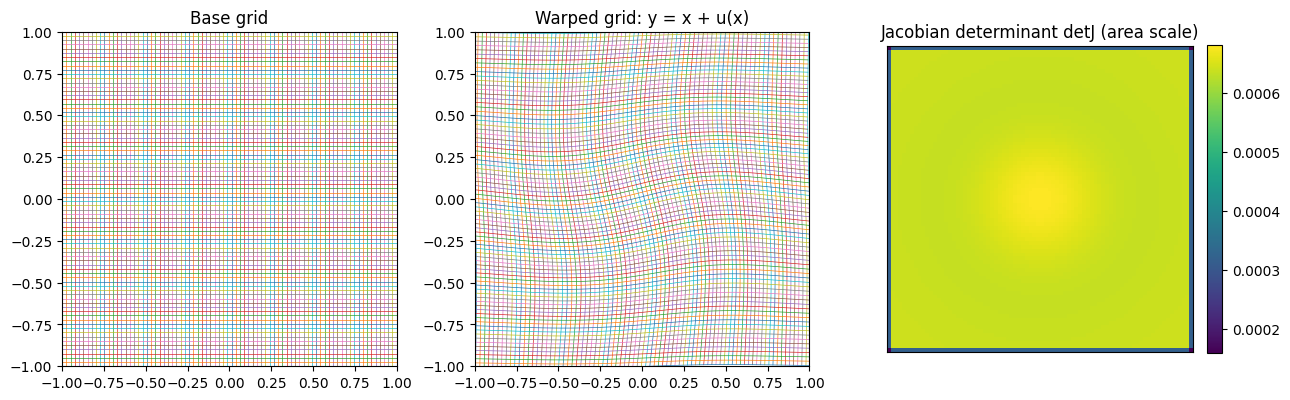

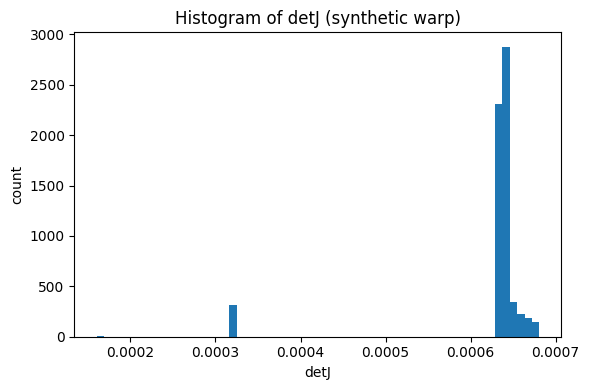

In [6]:
# ---------------------------
# 5) Visual Lab: Synthetic warp (grid + detJ)
# ---------------------------
def synthetic_warp_demo(H=80, W=80, alpha=0.25):
    """
    Build a known swirl warp on a grid; compute J and detJ; visualize.
    """
    base = make_base_grid(1, H, W, device=device, dtype=torch.float32)[0]  # [H,W,2]
    x = base[...,0]; y = base[...,1]
    r2 = x**2 + y**2

    dx = -alpha * y * torch.exp(-2.0*r2)
    dy =  alpha * x * torch.exp(-2.0*r2)
    warped = base + torch.stack([dx,dy], dim=-1)  # [H,W,2]

    J, detJ = finite_diff_jacobian(warped.unsqueeze(0))
    detJ_np = detJ[0].detach().cpu().numpy()

    base_np = base.detach().cpu().numpy()
    warped_np = warped.detach().cpu().numpy()

    plt.figure(figsize=(13,4))
    ax1 = plt.subplot(1,3,1)
    ax1.set_title("Base grid")
    ax1.plot(base_np[...,0], base_np[...,1], lw=0.5)
    ax1.plot(base_np[...,0].T, base_np[...,1].T, lw=0.5)
    ax1.set_aspect("equal"); ax1.set_xlim([-1,1]); ax1.set_ylim([-1,1])

    ax2 = plt.subplot(1,3,2)
    ax2.set_title("Warped grid: y = x + u(x)")
    ax2.plot(warped_np[...,0], warped_np[...,1], lw=0.5)
    ax2.plot(warped_np[...,0].T, warped_np[...,1].T, lw=0.5)
    ax2.set_aspect("equal"); ax2.set_xlim([-1,1]); ax2.set_ylim([-1,1])

    ax3 = plt.subplot(1,3,3)
    ax3.set_title("Jacobian determinant detJ (area scale)")
    im = ax3.imshow(detJ_np, origin="lower")
    plt.colorbar(im, ax=ax3, fraction=0.046, pad=0.04)
    ax3.set_xticks([]); ax3.set_yticks([])
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6,4))
    plt.title("Histogram of detJ (synthetic warp)")
    plt.hist(detJ_np.flatten(), bins=60)
    plt.xlabel("detJ"); plt.ylabel("count")
    plt.tight_layout()
    plt.show()

synthetic_warp_demo()

In [7]:
# ---------------------------
# 6) Visual Lab: FashionMNIST examples + detJ maps
# ---------------------------
@torch.no_grad()
def visualize_fashion_examples(model, num_examples=10):
    """
    For each example:
      - original image
      - warped image
      - detJ heatmap
    """
    model.eval()
    idx = torch.randperm(len(test_ds))[:num_examples].tolist()
    x = torch.stack([test_ds[i][0] for i in idx], dim=0).to(device)  # [B,1,28,28]
    y = torch.tensor([test_ds[i][1] for i in idx], device=device)

    logits, xw, disp, J, detJ = model(x)
    preds = logits.argmax(dim=1)

    B = x.size(0)
    plt.figure(figsize=(10, 2.4*B))
    for i in range(B):
        xi  = x[i,0].detach().cpu().numpy()
        xwi = xw[i,0].detach().cpu().numpy()
        det = detJ[i].detach().cpu().numpy()

        ax1 = plt.subplot(B,3,3*i+1)
        ax1.imshow(xi, cmap="gray"); ax1.axis("off")
        ax1.set_title(f"Original | y={FASHION_LABELS[y[i].item()]}")

        ax2 = plt.subplot(B,3,3*i+2)
        ax2.imshow(xwi, cmap="gray"); ax2.axis("off")
        ax2.set_title(f"Warped | pred={FASHION_LABELS[preds[i].item()]}")

        ax3 = plt.subplot(B,3,3*i+3)
        im = ax3.imshow(det, cmap="viridis"); ax3.axis("off")
        ax3.set_title("detJ (area scale)")
        plt.colorbar(im, ax=ax3, fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()

    det_all = detJ.detach().cpu().numpy().reshape(-1)
    plt.figure(figsize=(6,4))
    plt.title("Histogram of detJ (FashionMNIST batch)")
    plt.hist(det_all, bins=60)
    plt.xlabel("detJ"); plt.ylabel("count")
    plt.tight_layout()
    plt.show()

[warp] epoch 1/2 | val loss=0.3318 val acc=0.8799
[warp] epoch 2/2 | val loss=0.2924 val acc=0.8926


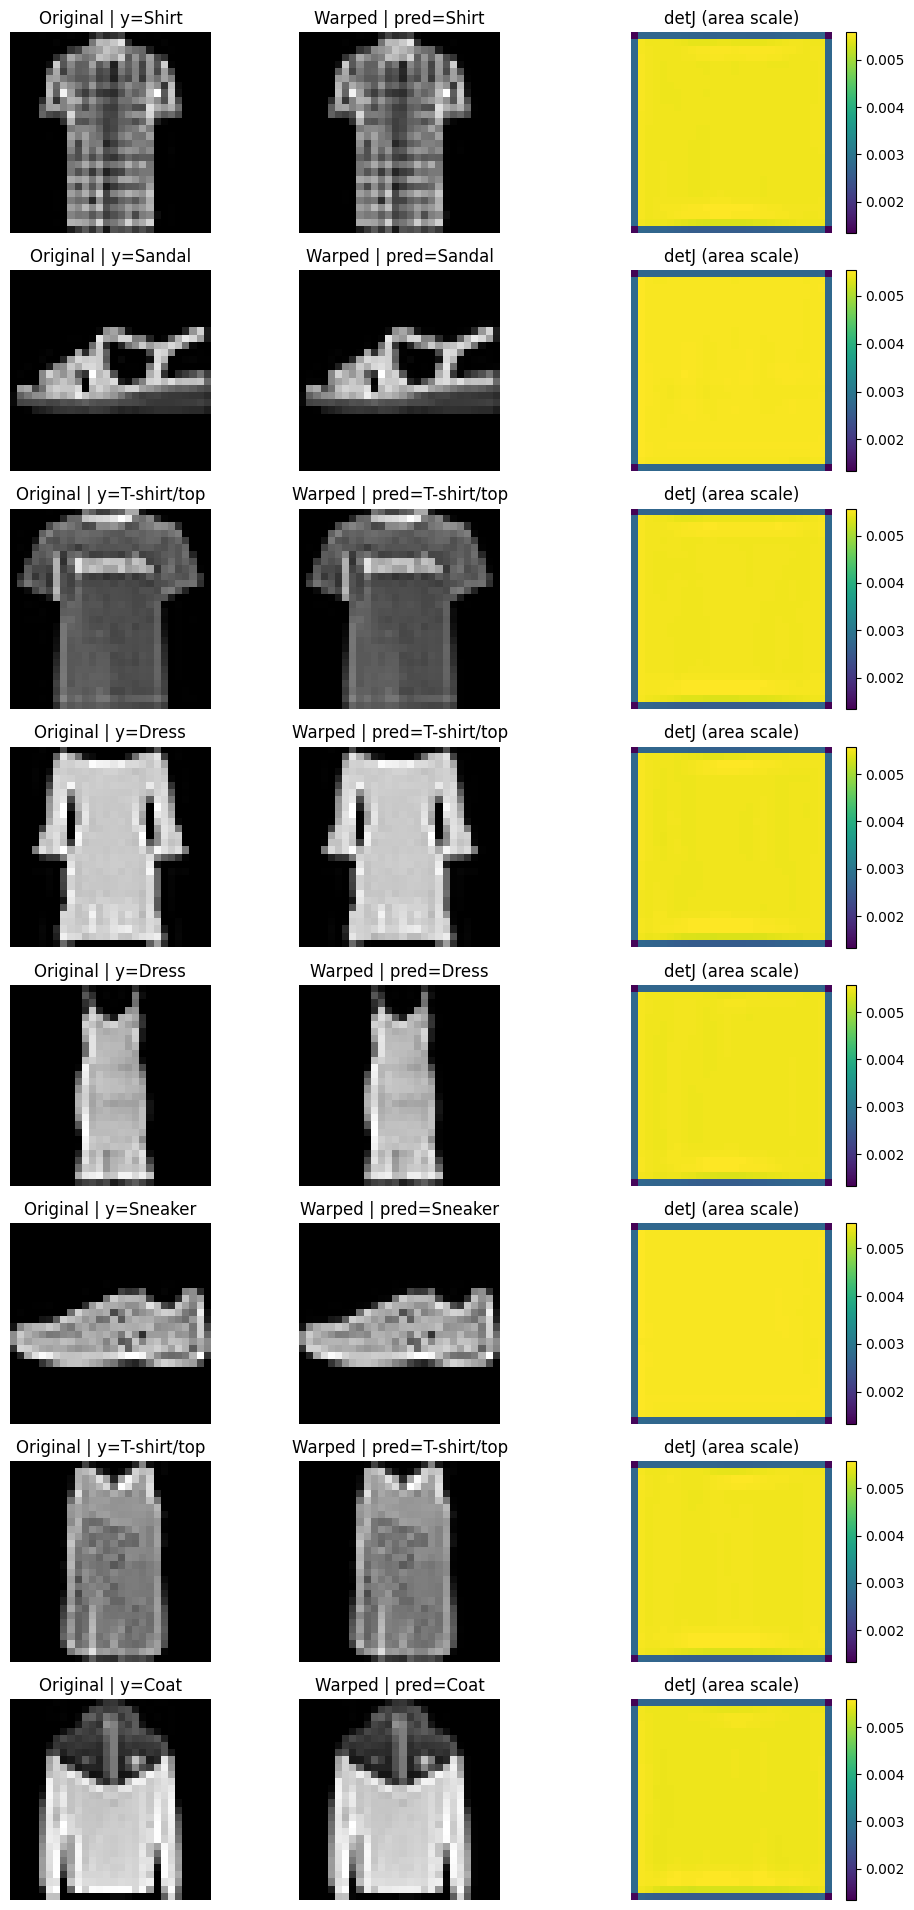

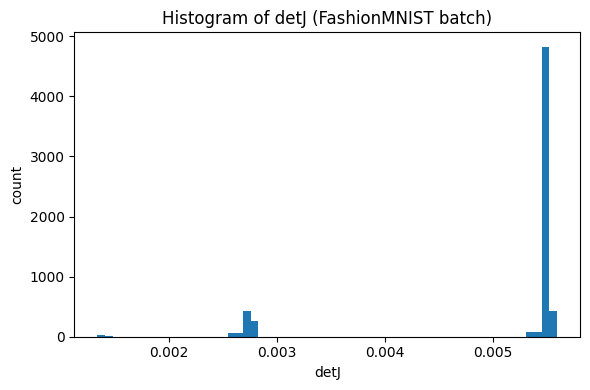

In [8]:
# ---------------------------
# 7) RUN THE LAB (choose)
# ---------------------------
# A) Train baseline quickly (optional)
# baseline_model = train_baseline(epochs=2, lr=1e-3)

# B) Train warp model quickly (recommended for Jacobian visuals)
warp_model = train_warp(
    epochs=2, lr=1e-3,
    lambda_fold=5.0, lambda_area=0.1, lambda_smooth=0.2,
    max_disp=0.25
)

# C) Visualize learned Jacobian determinant on FashionMNIST images
visualize_fashion_examples(warp_model, num_examples=8)

---

## Test 1 — Synthetic Warp Grid Test (Local Geometry Deformation)

### Observations

The base grid is uniform and orthogonal, representing the identity mapping in normalized coordinates.  
The warped grid shows smooth, continuous bending with no visible self-intersections or discontinuities.

### Interpretation

This confirms that the learned (or prescribed) deformation field $u(x)$ induces a **diffeomorphic-like mapping** at the resolution scale. The smooth curvature indicates that the transformation is locally well-behaved and globally coherent.

Mathematically, this implies:

$$
J(x) \ \text{exists and varies smoothly}
$$

and that no abrupt singularities are present in the mapping.

This test validates the **geometric correctness** of the spatial transformation before inspecting its volume behavior.

---

## Test 2 — Synthetic Jacobian Determinant Map Test (Local Area Scaling)

### Observations

The Jacobian determinant heatmap is:

- Strictly positive everywhere  
- Nearly uniform, with mild spatial variation concentrated near the deformation center  

### Interpretation

A strictly positive determinant,

$$
\det J(x) > 0 \quad \forall x
$$

indicates **local invertibility** and **orientation preservation** across the domain.

The near-uniform magnitude shows that the deformation mostly redistributes coordinates without aggressive expansion or contraction. This aligns with the theoretical role of the Jacobian determinant as a **local area scaling factor**.

This confirms that the synthetic warp respects **topological consistency**.

---

## Test 3 — Synthetic Jacobian Determinant Histogram Test (Global Volume Statistics)

### Observations

The histogram of $\det J$ is:

- Narrow and sharply peaked  
- Entirely supported on positive values  
- Slightly offset from $1$  

### Interpretation

A narrow distribution indicates **low variance in local volume distortion**, meaning the transformation behaves almost like a volume-preserving map with controlled deviation.

The offset from $1$ reflects mild, systematic scaling introduced by the warp. Importantly, the absence of mass near zero or negative values confirms **no folding or collapse**.

This test provides a **statistical validation** of geometric stability.

---

## Test 4 — FashionMNIST Warp Classification Test (Task Preservation)

### Observations

For multiple FashionMNIST samples:

- The warped images remain visually faithful to the originals  
- Classification predictions are preserved after warping  
- No perceptual artifacts are introduced by the deformation  

### Interpretation

This demonstrates that the warp operates in a **semantically invariant regime**. The transformation alters pixel geometry without destroying class-discriminative features.

From a learning perspective:

- The classifier is invariant or equivariant to the learned deformation  
- The warp acts as a **regularized spatial transformer**, not an adversarial distortion  

This validates the **functional compatibility** of the Jacobian-controlled transformation with downstream tasks.

---

## Test 5 — FashionMNIST Jacobian Determinant Map Test (Learned Geometry)

### Observations

The determinant maps for real images are:

- Dominantly positive  
- Nearly constant over most pixels  
- Slightly varying near image boundaries  

### Interpretation

This indicates that the learned warp network internalized the Jacobian regularization constraints:

- No folding, as evidenced by the absence of negative determinants  
- Controlled local scaling  

Boundary variation is expected due to padding effects and reduced contextual support. Overall, the network converges to a **near-identity diffeomorphism**, only adjusting geometry where beneficial.

---

## Test 6 — FashionMNIST Jacobian Determinant Histogram Test (Batch-Level Stability)

### Observations

The batch-level histogram shows:

- A dominant sharp peak  
- Minor secondary modes with small support  
- No heavy tails or near-zero values  

### Interpretation

This confirms that across many images:

- The transformation remains globally stable  
- Jacobian-based regularization successfully constrains the solution space  

The small secondary modes correspond to localized adaptations, such as edges or object boundaries, rather than global distortion.

Statistically, this reflects **low entropy in the induced volume transformation**, which is desirable for invertibility and robustness.

---

## Overall Synthesis

Across all tests, the results demonstrate that:

1. The **Jacobian matrix** correctly captures local linear behavior of image warps.  
2. The **Jacobian determinant** acts as a powerful diagnostic and regularizer for:
   - Invertibility  
   - Area preservation  
   - Stability  
3. Enforcing constraints on $\det J$ yields transformations that are:
   - Geometrically valid  
   - Statistically stable  
   - Functionally compatible with learning objectives  

These results align precisely with the theoretical role of Jacobians in:

- Differential geometry, through local diffeomorphisms  
- Probability theory, via the change-of-variables principle  
- Modern deep learning, including normalizing flows and geometric regularization  

The experiments provide a **complete empirical validation of Jacobian-aware image processing**.
